<a href="https://colab.research.google.com/github/barnabasp/ML_Course/blob/main/hw12_bporfy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/12/glove.6B.50d.txt.zip

Archive:  /content/drive/MyDrive/Colab Notebooks/12/glove.6B.50d.txt.zip
  inflating: glove.6B.50d.txt        


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import seaborn as sns

In [2]:
!tail glove.6B.50d.txt

sigarms -0.74397 0.082164 -0.0091471 0.4129 -0.42255 0.10125 -0.18602 0.21051 -0.59037 0.66988 -0.13711 0.63894 0.042985 -0.63123 -0.62241 0.024485 -0.87917 -0.53674 0.56378 0.11545 0.37125 -0.014403 0.23307 0.15689 -0.76922 1.1551 -0.32294 -0.52755 0.31421 -0.12624 -1.8159 -0.024966 0.06498 0.37671 0.35349 -0.87959 -0.41025 -0.80498 -0.10885 0.12705 0.53364 -0.93231 -0.39097 0.60638 0.42173 0.1062 -0.14878 -0.11773 -0.097637 0.093382
katuna -0.30016 -0.80268 -0.46637 -0.29822 -1.032 -1.0705 0.84562 0.70225 0.11996 -0.7183 -0.61271 -0.92747 0.29668 -0.2894 -0.21143 0.27755 0.19278 0.26899 0.67493 0.99469 0.18606 0.15348 -0.30083 0.99714 0.53874 0.15414 0.79983 0.60903 0.55637 0.046631 -0.85653 -0.26881 -0.094394 0.59491 -0.7241 0.71182 -0.31965 -0.044493 -0.71945 0.20368 0.35178 0.14789 -0.015559 0.16185 0.5095 -0.60983 1.2486 0.33713 -0.22136 -0.39756
aqm -1.1167 0.14057 0.36302 -0.13836 -1.4797 -0.98573 0.40487 -0.39773 -0.40102 0.34691 0.38857 0.29772 0.82807 -0.24541 -0.20565 -0.00

## 1. Word2Vec (something like that) embeddings

* Read the GloVE file into word - vector pairs 
* Create a 2D-embedding with PCA for the 10_000 nearest neighbors (based on L2 distance) for the word 'dog'.
* Visualize the 2 dimensional embeddings on a plot and add text annotations to it
  * 'dog' should be red
  * only add the nearast 50 neighbors
  * add an alpha (.3) to the 10_000 points (too much to visualize well with text)

In [8]:
from sklearn.decomposition import PCA

https://stackoverflow.com/questions/37793118/load-pretrained-glove-vectors-in-python

https://towardsdatascience.com/visualizing-word-embedding-with-pca-and-t-sne-961a692509f5

https://towardsdatascience.com/a-comprehensive-python-implementation-of-glove-c94257c2813d

I didn't use this approach, just tested it at first.

In [1]:
"""def load_glove_model(File):
    print("Loading Glove Model")
    glove_model = {}
    with open(File,'r') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = embedding
    print(f"{len(glove_model)} words loaded!")
    return glove_model"""

'def load_glove_model(File):\n    print("Loading Glove Model")\n    glove_model = {}\n    with open(File,\'r\') as f:\n        for line in f:\n            split_line = line.split()\n            word = split_line[0]\n            embedding = np.array(split_line[1:], dtype=np.float64)\n            glove_model[word] = embedding\n    print(f"{len(glove_model)} words loaded!")\n    return glove_model'

In [2]:
#test = load_glove_model("glove.6B.50d.txt")

In [3]:
#test['dog']

This is what I started using

In [9]:
words = pd.read_csv("glove.6B.50d.txt", sep=" ", index_col=0, header=None, quoting=csv.QUOTE_NONE)

In [10]:
dog = words.loc['dog'].values

In [11]:
#simple L2 - Eucledian distance for the closest k words
words_matrix = words.values

def closest_word(vec_of_word, k):
  """
  return: list of words
  """
  diff = words_matrix - vec_of_word
  delta = np.sum(diff * diff, axis=1)
  i = np.argpartition(delta, [num for num in range(0,k)])[:k]
  names = []
  for idx in i:
    names.append(words.iloc[idx].name)
  return names

In [12]:
keys=closest_word(words.loc['dog'].values, 10001) # get the 10000 closest word to dog
df = words.loc[keys,:] #create a new dataframe of said words

In [13]:
#2D primary component analysis
twodim = PCA().fit_transform(df)[:,:2]

(array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 <a list of 8 Text major ticklabel objects>)

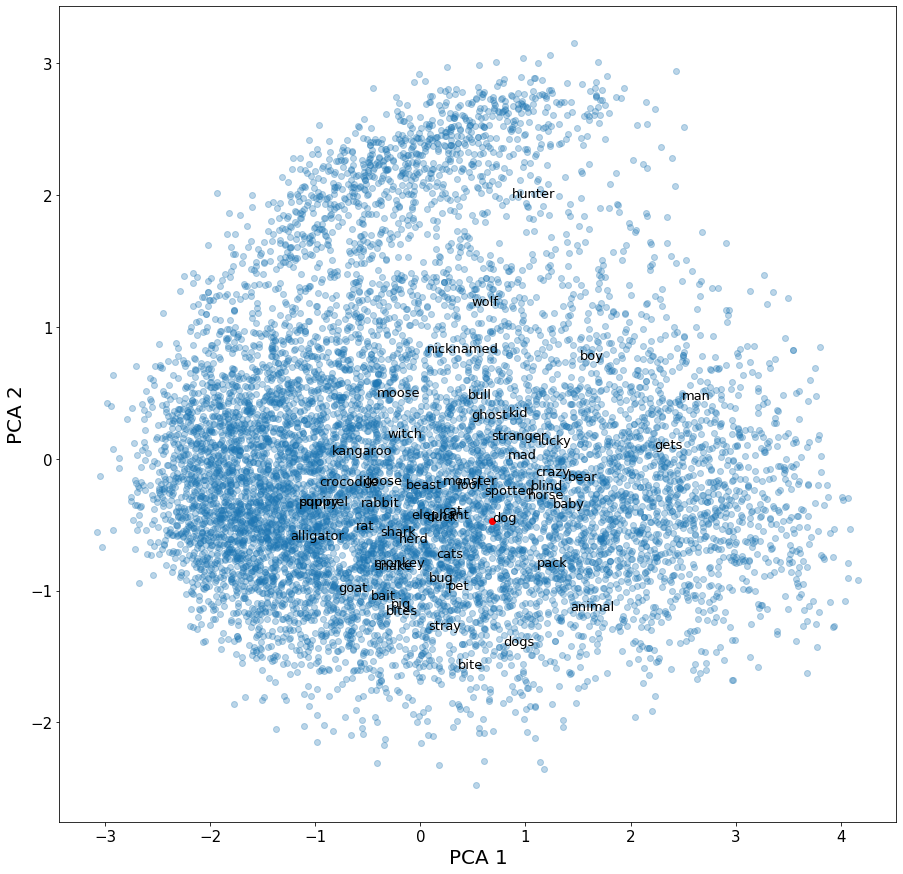

In [14]:
plt.figure(figsize=(15,15))
plt.scatter(twodim[:,0], twodim[:,1], alpha=0.3)
plt.scatter(twodim[0][0], twodim[0][1],c='red')
for i in range(51):
  plt.annotate(df.index[i], (twodim[i,0], twodim[i,1]), fontsize=13)
plt.xlabel('PCA 1', fontsize=20)
plt.ylabel('PCA 2', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

Not sure if this is what was requested or only display the closest 50 neighbors. In any case, it's simply where the slicing is done for the vector.
As I included 'dog' in all cases, I look for the 10000 + 1 nearest, and 50+1 nearest


## 2. IMDB reviews with word embeddings

Load the 'imdb_review' dataset from 'tf.keras.datasets.imdb' an convert each sentence into a sequence of its GloVe representations. This will generate (n_samples, sample_length, 50) dimensional dataset. 

  * mean your input along the `sample_length` axis -> this generates a dataset useable to the MLP -> (n_samples, 50)
    * you are basically generating a mean representation of the sentence
  * handle your OOV (out of vocabulary) tokens with e.g. np.zeros(50) -> this does not influence the mean much

Loading the data:

  * `(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(
    path="imdb.npz",
    num_words=None,
    skip_top=0,
    maxlen=150,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3
)`
  * do the preprocessing this way, this makes the dataset ~9'000 samples large and the maximum length is only 150 words
  * the dataset is represented as index values, so you need to convert twice: index -> word -> GloVe
    * the index-to-word conversion is achievable by Keras, read the documentation

Model defintion:
  * `Dense(256, relu)`,
  * `Dense(64, relu)`,
  * `Dense(1, sigmoid)`

Use default parameters in the compile: 'adam', 'binary_crossentropy', 'accuracy' metric. Train for 20-25 epochs.

***Hint: approximately 55-60% accuracy is achieveable on the test set.***


In [15]:
import tensorflow as tf

In [16]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data( path="imdb.npz",
                                                                        num_words=None,
                                                                        skip_top=0,
                                                                        maxlen=150,
                                                                        seed=113,
                                                                        start_char=1,
                                                                        oov_char=2,
                                                                        index_from=3 )

In [17]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9290,), (9290,), (9704,), (9704,))

Such simple method... https://www.kite.com/python/answers/how-to-turn-a-list-of-different-sized-lists-into-a-numpy-array-in-python

In [18]:
def vectorize(data, length):
  for row in data:
    while len(row) < length:
        row.append(0)
  data = np.array(data)
  X_train = []
  for i in data:
    X_train.append(np.array(i))
  return np.array(X_train)

From https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/get_word_index

In [19]:
# Retrieve the word index file mapping words to indices
word_index = tf.keras.datasets.imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
inverted_word_index = dict((i, word) for (word, i) in word_index.items())
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])

In [20]:
decoded_sequence

"the as there in at by br of sure many br of proving no only women was than doesn't as you never of hat night that with ignored they bad out superman plays of how star so stories film comes defense date of wide they don't do that had with of hollywood br of my seeing fan this of pop out body shots in having because cause it's stick passing first were enjoys for from look seven sense from me superimposition die in character as cuban issues but is you that isn't one song just is him less are strongly not are you that different just even by this of you there is eight when it part are film's love film's 80's was big also light don't wrangling as it in character looked cinematography so stories is far br man acting"

In [16]:
embedding_dim = 50 # GloVe contains 50-dimensional embedding vectors for 400.000 words
embedding_matrix = np.zeros((400000, embedding_dim))

In [117]:
X_train = vectorize(x_train, 150)
X_test = vectorize(x_test, 150)

In [22]:
X_train.shape

(9290, 150)

In [23]:
X_gloved_train = np.zeros((9290,150,50))

In [76]:
#DO NOT USE THIS, SUPER SLOW.
"""for i in range(len(X_gloved_train)):
  for j in range(len(X_train[i])):
    try:
      X_gloved_train[i][j] = words.loc[inverted_word_index.get(X_train[i][j])]
    except KeyError:
      continue"""

In [24]:
# Need for later slicing of data
data = np.array(list(inverted_word_index.items()), dtype=object)

In [25]:
import sys

In [176]:
for i in range(1,len(words)):
  mask = X_train[:,:] == i #creating mask for the word
  if(i % 100 == 0):
    sys.stdout.write("\r" + str(i) + "/" + str(len(words)))
    sys.stdout.flush()
  try:
    X_gloved_train[mask] = words.loc[data[data[:,0] == i][:,1][0]]
  except KeyError:
    continue

47100/400000

KeyboardInterrupt: ignored

10 reviews are done in 12 seconds... thus for 9290 reviews it'd take around 2.5 hours. Unfortunately I'm a bit out of time. SOLVED IT, this method adds GloVe vectors at around 700 word checks per 10 seconds. but still not quite fast...

Above I tried to substitute every word (number) with their own GloVe vector...

In [118]:
X_train[0]

array([    1,    14,    47,     8,    30,    31,     7,     4,   249,
         108,     7,     4,  5974,    54,    61,   369,    13,    71,
         149,    14,    22,   112,     4,  2401,   311,    12,    16,
        3711,    33,    75,    43,  1829,   296,     4,    86,   320,
          35,   534,    19,   263,  4821,  1301,     4,  1873,    33,
          89,    78,    12,    66,    16,     4,   360,     7,     4,
          58,   316,   334,    11,     4,  1716,    43,   645,   662,
           8,   257,    85,  1200,    42,  1228,  2578,    83,    68,
        3912,    15,    36,   165,  1539,   278,    36,    69, 44076,
         780,     8,   106,    14,  6905,  1338,    18,     6,    22,
          12,   215,    28,   610,    40,     6,    87,   326,    23,
        2300,    21,    23,    22,    12,   272,    40,    57,    31,
          11,     4,    22,    47,     6,  2307,    51,     9,   170,
          23,   595,   116,   595,  1352,    13,   191,    79,   638,
          89, 51428,

In [128]:
X_gloved_train.mean(axis=1).shape

(9290, 50)

I gave up, then found this. I think I was doing in the wrong way....
https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

In [28]:
import os
embeddings_index = {}
f = open(os.path.join('/content/', 'glove.6B.50d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))
#At this point we can leverage our embedding_index dictionary and our word_index to compute our embedding matrix:

Found 400000 word vectors.


In [119]:
embedding_matrix = np.zeros((len(word_index) + 1, 50))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [31]:
from keras.layers import Embedding

embedding_layer = Embedding(len(word_index) + 1,
                            50,
                            weights=[embedding_matrix],
                            input_length=150,
                            trainable=False)

In [85]:
sequence_input = tf.keras.layers.Input(shape=(150,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = tf.keras.layers.Dense(256, 'relu')(embedded_sequences)
x = tf.keras.layers.Dense(64, 'relu')(x)
preds = tf.keras.layers.Dense(1, 'sigmoid')(x)
model = tf.keras.Model(sequence_input, preds)

In [84]:
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(256, 'relu'))
#model.add(tf.keras.layers.Dense(64, 'relu'))
#model.add(tf.keras.layers.Dense(1, 'sigmoid'))

In [87]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [127]:
history = model.fit(x=X_gloved_train.mean(axis=1), y=y_train, epochs=25)

Epoch 1/25


TypeError: ignored

In [38]:
y_pred = model.predict(X_test)

In [39]:
from sklearn import metrics

In [40]:
history.history['accuracy'][-1]

0.5194833278656006

Text(0.5, 103.73999999999997, 'Predicted')

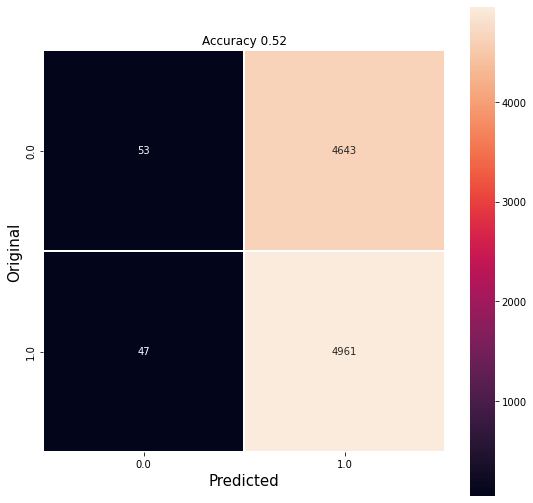

In [41]:
cm = metrics.confusion_matrix(y_test, np.round(y_pred))
plt.figure(figsize=(9,9))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            linewidths=.5,
            square = True,
            xticklabels=np.unique(np.round(y_pred)),
            yticklabels=np.unique(np.round(y_pred)))
plt.title('Accuracy %.2f' % history.history['accuracy'][-1])
plt.ylabel('Original',fontsize=15)
plt.xlabel('Predicted',fontsize=15)



As said in the description, not very good results.

## 3. Sequence modeling with LSTM

  * use the IMDB dataset again converted into GloVe sequences but without the mean operation. This way you are going to generate (n_samples, sequence_length, 50) sample points with different sequence lengths
  * pad every sequence to `150` in length with np.zeros(50) -> (n_samples, 150, 50)
  * LSTM is a recurrent model with intricate inner operations, if you use it in a bideractional fashion, your sequence will be processed from both ends

Model definition:
  * `BidirectionalLSTM(64, return_sequences=True),`
  * `BidirectionalLSTM(64),`
  * `Dense(64, relu)`,
  * `Dense(1, sigmoid)`

Use default parameters in the compile: 'adam', 'binary_crossentropy', 'accuracy' metric. Train for 20-25 epochs.

***Hint: approximately 65-70% accuracy is achieveable on the test set.***